# 1. Installing required libraries

In [1]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.metrics import make_scorer,accuracy_score, confusion_matrix,mean_squared_error,r2_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 2. Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')
train_data = 'https://drive.google.com/uc?id={}'.format('17G0qaV4-pzoU1RWcxIuLESSOx6RrWNh9')

Mounted at /content/drive


In [4]:
data = pd.read_csv(train_data)

# 3. Visualising the data

In [5]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


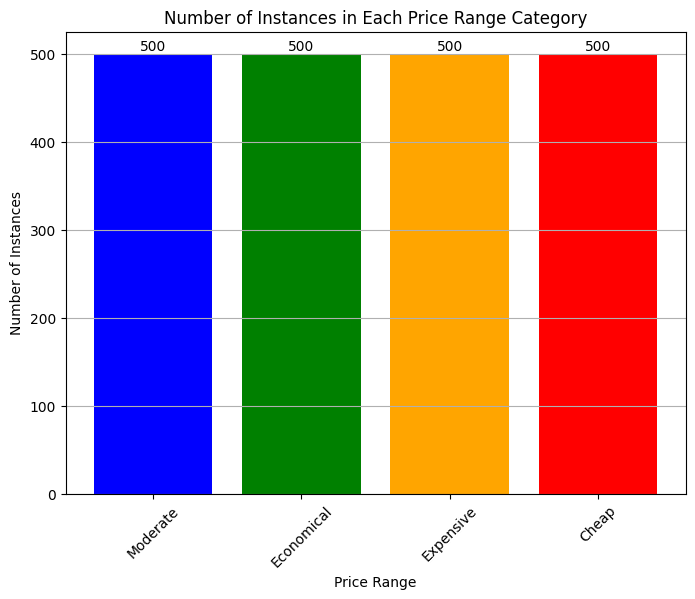

In [6]:
# Mapping numerical labels to categorical names
label_mapping = {
    0: 'Cheap',
    1: 'Moderate',
    2: 'Economical',
    3: 'Expensive'
}

# Counting instances of each class
class_counts = data['price_range'].map(label_mapping).value_counts()

# Define colors for each bar
colors = ['blue', 'green', 'orange', 'red']

# Creating a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.index, class_counts, color=colors)

# Add labels with counts on top of each bar
for bar, count in zip(bars, class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom')

plt.title('Number of Instances in Each Price Range Category')
plt.xlabel('Price Range')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

## **One hot encoding**

In [7]:
import pandas as pd



# DataFrame
data = {
    'battery_power': [1000, 1200, 800],
    'blue': [1, 0, 1],
    'clock_speed': [1.2, 2.0, 1.5],
    'dual_sim': [1, 0, 1],
    'fc': [5, 8, 12],
    'four_g': [1, 0, 1],
    'int_memory': [16, 32, 64],
    'm_dep': [0.5, 0.8, 1.0],
    'mobile_wt': [150, 180, 200],
    'n_cores': [4, 8, 6],
    'pc': [8, 16, 12],
    'px_height': [720, 1080, 800],
    'px_width': [1280, 1920, 1600],
    'ram': [2048, 4096, 8192],
    'sc_h': [5, 6, 7],
    'sc_w': [3, 4, 5],
    'talk_time': [10, 12, 8],
    'three_g': [1, 0, 1],
    'touch_screen': [1, 0, 1],
    'wifi': [1, 1, 0]
}

df = pd.DataFrame(data)

# Select only the specified columns
selected_columns = [
    'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
    'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
    'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'
]

selected_data = df[selected_columns]

# Applying one-hot encoding to the selected columns
df_encoded = pd.get_dummies(selected_data, columns=selected_columns)

# Display the resulting DataFrame with one-hot encoding
print(df_encoded)


   battery_power_800  battery_power_1000  battery_power_1200  blue_0  blue_1  \
0                  0                   1                   0       0       1   
1                  0                   0                   1       1       0   
2                  1                   0                   0       0       1   

   clock_speed_1.2  clock_speed_1.5  clock_speed_2.0  dual_sim_0  dual_sim_1  \
0                1                0                0           0           1   
1                0                0                1           1           0   
2                0                1                0           0           1   

   ...  sc_w_5  talk_time_8  talk_time_10  talk_time_12  three_g_0  three_g_1  \
0  ...       0            0             1             0          0          1   
1  ...       0            0             0             1          1          0   
2  ...       1            1             0             0          0          1   

   touch_screen_0  touch_screen_1

### **`SVM`**

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading dataset
data = pd.read_csv('/content/Train_Data (3).csv')

# Features (X) and target variable (y)
X = data.drop('price_range', axis=1)  # Features (excluding the target variable)
y = data['price_range']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVM model
svm_model = SVC()

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

# Create Grid Search with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Accessing results
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')

# Print classification report and confusion matrix
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.93      1.00      0.96        91
           2       0.99      0.97      0.98        92
           3       0.98      0.99      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.97      0.98       400

Confusion Matrix:
 [[ 99   6   0   0]
 [  0  91   0   0]
 [  0   1  89   2]
 [  0   0   1 111]]


In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading dataset
data = pd.read_csv('/content/Train_Data (3).csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Features (X) and target variable (y)
X = data.drop('price_range', axis=1)  # Features (excluding the target variable)
y = data['price_range']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM model for classification
svm_model = SVC(kernel='linear', C=1.0)  # You can experiment with different kernels (linear, rbf, poly, etc.)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report and confusion matrix
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))



   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

# 4. Feature Selection

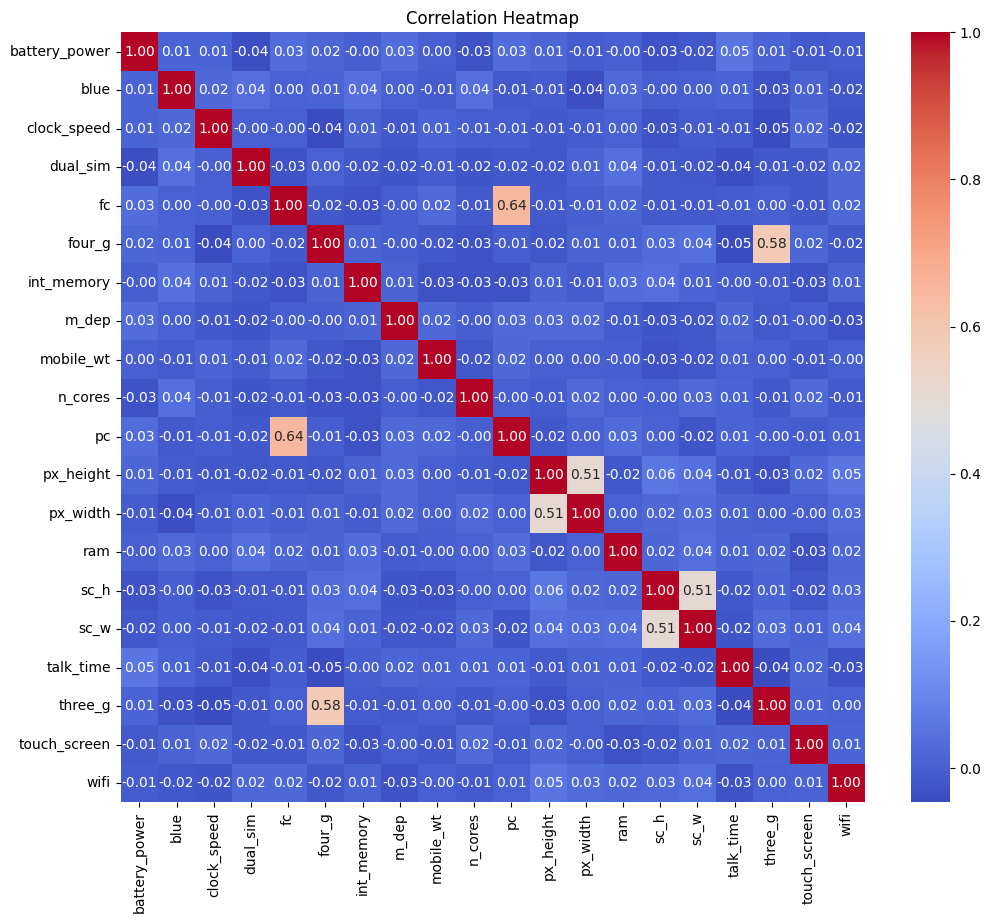

In [ ]:
selected_columns = [
    'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
    'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
    'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'
]

selected_data = data[selected_columns]
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = data[selected_columns]
y = data['price_range']

# Initialize SelectKBest with chi2 scoring function (for classification)
k_best = SelectKBest(score_func=chi2, k='all')

# Fit SelectKBest to your data
k_best.fit(X, y)

# Get the scores and feature names
feature_scores = k_best.scores_
feature_names = X.columns

# Create a DataFrame to display feature scores
feature_importance = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
feature_importance = feature_importance.sort_values(by='Score', ascending=False)

# Display the feature importance
print(feature_importance)

          Feature          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556
18   touch_screen       1.928429
5          four_g       1.521572
7           m_dep       0.745820
1            blue       0.723232
2     clock_speed       0.648366
3        dual_sim       0.631011
19           wifi       0.422091
17        three_g       0.327643


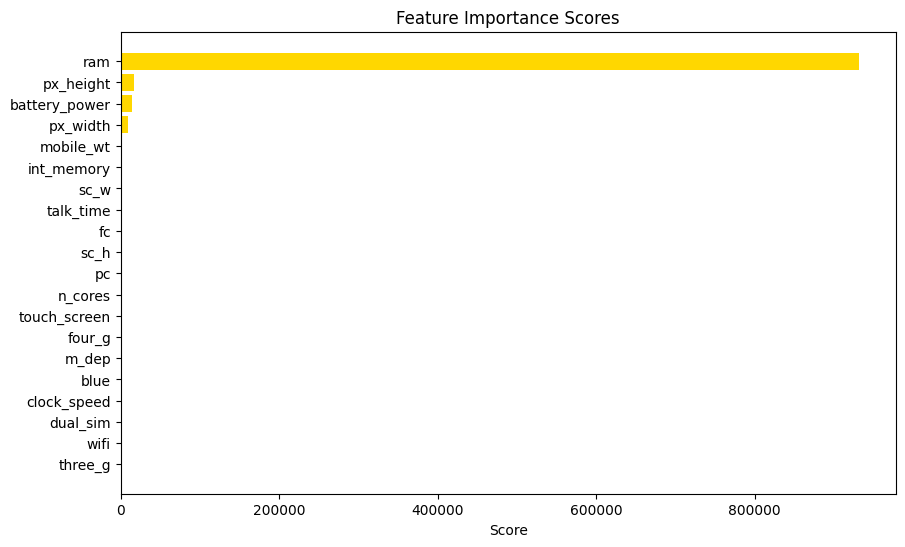

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Score'], color='gold')
plt.xlabel('Score')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

Features removed due to correlation:  
px_width  
pc  
sc_h  
three_g  

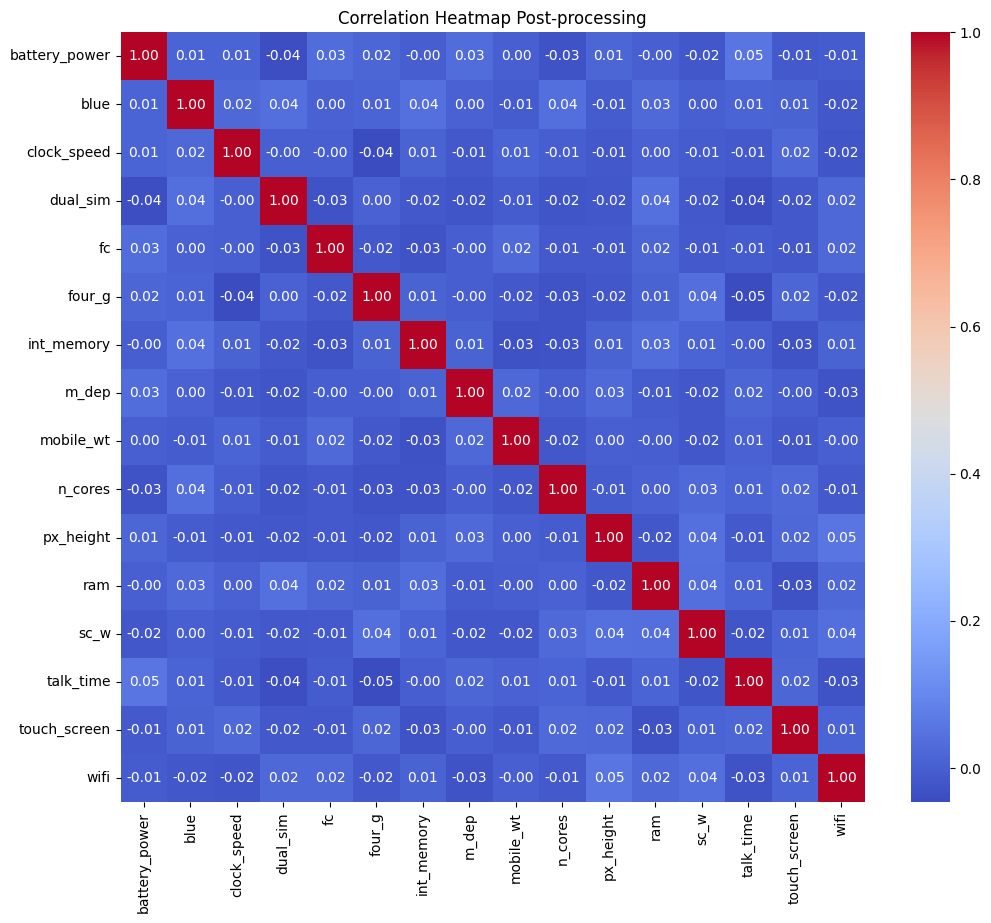

In [ ]:
selected_columns = [
    'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
    'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'px_height',
    'ram', 'sc_w', 'talk_time', 'touch_screen', 'wifi'
]

selected_data = data[selected_columns]
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Post-processing')
plt.show()

# 5. Pre-processing data

In [ ]:
columns_to_standardize = [
    'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',
    'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'
]

scaler = StandardScaler()
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

In [ ]:
clean_data = data.copy()

# 6. Splitting training and testing dataset

In [ ]:
y = clean_data[['price_range']].copy()

Fetures with greater than 10 chi2 score have been selected

In [ ]:
independent_variables = ['ram', 'px_height', 'battery_power','px_width', 'mobile_wt', 'int_memory', 'sc_w', 'talk_time', 'fc']

In [ ]:
x = clean_data[independent_variables].copy()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
y_train = y_train.values.ravel()

# 7. Models

## 7.1. Decision Tree

In [ ]:
classifier = DecisionTreeClassifier(random_state=1)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
#Validation
y_predict = classifier.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, y_predict)
decision_tree_precision = precision_score(y_test, y_predict, average='macro')
decision_tree_recall = recall_score(y_test, y_predict, average='macro')
decision_tree_f1 = f1_score(y_test, y_predict, average='macro')

print("Accuracy:", decision_tree_accuracy)
print("Precision:", decision_tree_precision)
print("Recall:", decision_tree_recall)
print("F1-score:", decision_tree_f1)

Accuracy: 0.8666666666666667
Precision: 0.8702590115003479
Recall: 0.8691364362924765
F1-score: 0.8688403263403264


## 7.2. Random Forest

In [ ]:
classifier = RandomForestClassifier(random_state=1)
classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
#Validation
y_predict = classifier.predict(X_test)

random_forest_accuracy = accuracy_score(y_test, y_predict)
random_forest_precision = precision_score(y_test, y_predict, average='macro')
random_forest_recall = recall_score(y_test, y_predict, average='macro')
random_forest_f1 = f1_score(y_test, y_predict, average='macro')

print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1-score:", random_forest_f1)

Accuracy: 0.88
Precision: 0.8821904230040672
Recall: 0.882360752411088
F1-score: 0.8820049282369291


## 7.3. XGBoost

In [ ]:
classifier = xgb.XGBClassifier(random_state=1)
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#Validation
y_predict = classifier.predict(X_test)

XGBoost_accuracy = accuracy_score(y_test, y_predict)
XGBoost_precision = precision_score(y_test, y_predict, average='macro')
XGBoost_recall = recall_score(y_test, y_predict, average='macro')
XGBoost_f1 = f1_score(y_test, y_predict, average='macro')

print("Accuracy:", XGBoost_accuracy)
print("Precision:", XGBoost_precision)
print("Recall:", XGBoost_recall)
print("F1-score:", XGBoost_f1)

Accuracy: 0.91
Precision: 0.9132259381676658
Recall: 0.9115230882848332
F1-score: 0.9122247583243823


## 7.4. LightGBM

In [ ]:
classifier = lgb.LGBMClassifier(random_state=1)
classifier.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1266
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 9
[LightGBM] [Info] Start training from score -1.344330
[LightGBM] [Info] Start training from score -1.383441
[LightGBM] [Info] Start training from score -1.439093
[LightGBM] [Info] Start training from score -1.380596
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=1)

In [ ]:
#Validation
y_predict = classifier.predict(X_test)

LightGBM_accuracy = accuracy_score(y_test, y_predict)
LightGBM_precision = precision_score(y_test, y_predict, average='macro')
LightGBM_recall = recall_score(y_test, y_predict, average='macro')
LightGBM_f1 = f1_score(y_test, y_predict, average='macro')

print("Accuracy:", LightGBM_accuracy)
print("Precision:", LightGBM_precision)
print("Recall:", LightGBM_recall)
print("F1-score:", LightGBM_f1)

Accuracy: 0.9
Precision: 0.9039258505243988
Recall: 0.9017945618197296
F1-score: 0.9024982426252761


## 7.5. Logistic Regression

In [ ]:
classifier = LogisticRegression(random_state=1, max_iter=10000)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=1)

In [ ]:
#Validation
y_predict = classifier.predict(X_test)

logistic_regression_accuracy = accuracy_score(y_test, y_predict)
logistic_regression_precision = precision_score(y_test, y_predict, average='macro')
logistic_regression_recall = recall_score(y_test, y_predict, average='macro')
logistic_regression_f1 = f1_score(y_test, y_predict, average='macro')

print("Accuracy:", logistic_regression_accuracy)
print("Precision:", logistic_regression_precision)
print("Recall:", logistic_regression_recall)
print("F1-score:", logistic_regression_f1)

Accuracy: 0.9583333333333334
Precision: 0.9591434133133263
Recall: 0.9604909439640983
F1-score: 0.959701814576674


## 7.6. Finding the best model

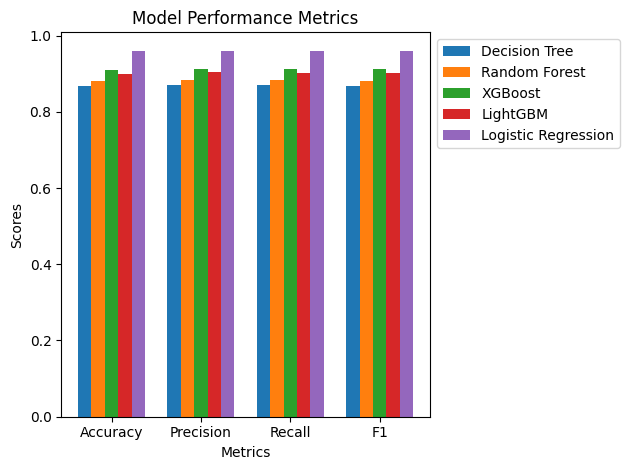

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
decision_tree_scores = [decision_tree_accuracy, decision_tree_precision, decision_tree_recall, decision_tree_f1]
random_forest_scores = [random_forest_accuracy, random_forest_precision, random_forest_recall, random_forest_f1]
XGBoost_scores = [XGBoost_accuracy, XGBoost_precision, XGBoost_recall, XGBoost_f1]
LightGBM_scores = [LightGBM_accuracy, LightGBM_precision, LightGBM_recall, LightGBM_f1]
logistic_regression_scores = [logistic_regression_accuracy, logistic_regression_precision, logistic_regression_recall, logistic_regression_f1]

bar_width = 0.15
index = np.arange(len(metrics))

plt.bar(index, decision_tree_scores, bar_width, label='Decision Tree')
plt.bar(index + bar_width, random_forest_scores, bar_width, label='Random Forest')
plt.bar(index + 2*bar_width, XGBoost_scores, bar_width, label='XGBoost')
plt.bar(index + 3*bar_width, LightGBM_scores, bar_width, label='LightGBM')
plt.bar(index + 4*bar_width, logistic_regression_scores, bar_width, label='Logistic Regression')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Metrics')
plt.xticks(index + 2*bar_width, metrics)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

We can see that **Logistic Regression** model have performed better in all metrics

# 8. Hypertuning parameters

In [ ]:
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings("ignore")

In [ ]:
#RandomizedSearchCV
param_space = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro')
}

# Define the model
model = LogisticRegression(random_state=1, max_iter=10000)

# Perform Randomized Search
opt = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_space,
    n_iter=30,
    scoring=scoring,
    refit='accuracy',
    cv=5,
    random_state=1
)

opt.fit(X_train, y_train)

# Accessing results
logistic_results = opt.cv_results_
logistic_best_index = logistic_results['rank_test_recall'].argmin()
logistic_best_params = logistic_results['params'][logistic_best_index]
logistic_best_score = logistic_results['mean_test_recall'][logistic_best_index]

print("Best Parameters for Logistic Regression: ", logistic_best_params)
print("Best Score for Logistic Regression: ", logistic_best_score)

Best Parameters for Logistic Regression:  {'solver': 'saga', 'penalty': 'l2', 'C': 100}
Best Score for Logistic Regression:  0.9731581942850701


GridSearchCV takes longer to implement and was giving the same parameter set as RandomizedSearchCV

In [ ]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
param_space = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

# Define the scoring dictionary
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro')
}

# Define the model
model = LogisticRegression(random_state=1, max_iter=10000)

# Perform Grid Search
grid = GridSearchCV(
    estimator=model,
    param_grid=param_space,
    scoring=scoring,
    refit='precision',
    cv=5
)

grid.fit(X_train, y_train)

# Accessing results
best_params = grid.best_params_
best_score = grid.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score:  0.9736978556678635


# 9. Fine-tuned model

In [ ]:
model=LogisticRegression(random_state=1, max_iter=10000, solver='saga', penalty='l2', C=100)
model.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=10000, random_state=1, solver='saga')

In [ ]:
#Train
y_predict_train = model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_predict_train)
train_precision = precision_score(y_train, y_predict_train, average='macro')
train_recall = recall_score(y_train, y_predict_train, average='macro')
train_f1 = f1_score(y_train, y_predict_train, average='macro')

print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)

Accuracy: 0.98
Precision: 0.9798187202112166
Recall: 0.9797414415113809
F1-score: 0.9797732111046231


In [ ]:
#Validation
y_predict = model.predict(X_test)

validation_accuracy = accuracy_score(y_test, y_predict)
validation_precision = precision_score(y_test, y_predict, average='macro')
validation_recall = recall_score(y_test, y_predict, average='macro')
validation_f1 = f1_score(y_test, y_predict, average='macro')

print("Accuracy:", validation_accuracy)
print("Precision:", validation_precision)
print("Recall:", validation_recall)
print("F1-score:", validation_f1)

Accuracy: 0.9716666666666667
Precision: 0.9723487565758011
Recall: 0.9733514074957027
F1-score: 0.9727984165421278


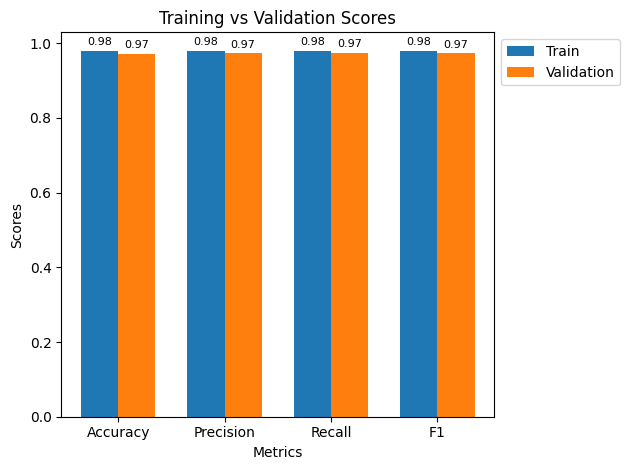

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
train_scores = [train_accuracy, train_precision, train_recall, train_f1]
validation_scores = [validation_accuracy, validation_precision, validation_recall, validation_f1]

# Create bar plot
bar_width = 0.35
index = np.arange(len(metrics))  # Use arange from numpy for array operations

plt.bar(index, train_scores, bar_width, label='Train')
plt.bar(index + bar_width, validation_scores, bar_width, label='Validation')

for i, v in enumerate(train_scores):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

for i, v in enumerate(validation_scores):
    plt.text(i + bar_width, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Training vs Validation Scores')
plt.xticks(index + bar_width / 2, metrics)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

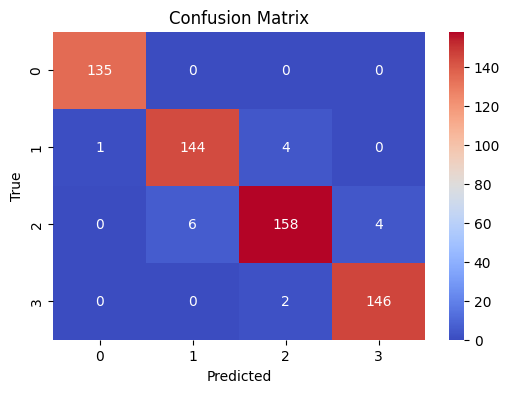

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predict)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d', annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()